# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [51]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from IPython.core.display import display, HTML
from IPython.display import display_html

display(  HTML( '<style>.container { width:99% !important; }</style>' )  )\

%config Completer.use_jedi = False
pd.set_option( 'display.max_columns', None )
import missingno as msno
import itertools, inspect
import matplotlib, graphviz
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import random, time
import seaborn as sns

In [52]:
credit_df = pd.read_csv( 'GermanCredit.csv' )

credit_df['Class'] =  sklearn.preprocessing.LabelEncoder( ).fit_transform( credit_df.Class )

feature_col = [ 'Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration', 'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'ForeignWorker' ]

xtrn, xtst, ytrn, ytst = sklearn.model_selection.train_test_split(  credit_df[feature_col], credit_df['Class'],
                                                                    test_size= 25/100, random_state= 10, stratify= credit_df['Class']  )

xtrn_np, xtst_np, ytrn_np, ytst_np = xtrn.to_numpy(), xtst.to_numpy(), ytrn.to_numpy(), ytst.to_numpy()

print( list(ytrn[:20]) ); xtrn.head()

[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]


,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,ForeignWorker
855,24,1474,4,3,33,1,1,1
354,10,727,4,4,46,1,1,1
339,10,1521,4,2,31,1,1,1
467,48,7238,3,3,32,2,2,1
657,48,10222,4,3,37,1,1,1


In [55]:
##  grid search func for a model

def grdSrc_model( max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, ccp_alpha ) :
    global xtrn_np, xtst_np, ytrn_np, ytst_np
    
    dtree_fit = sklearn.tree.DecisionTreeClassifier( max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, 
                                                     min_weight_fraction_leaf = min_weight_fraction_leaf, ccp_alpha = ccp_alpha, 
                                                     max_features = 'sqrt', random_state = 10 ).fit( xtrn_np, ytrn_np  )
    yhat = dtree_fit.predict( xtst_np )
    
    # calc the classification metrics
    try: balAccu = sklearn.metrics.balanced_accuracy_score( y_true= ytst_np, y_pred= yhat )
    except: balAccu = np.nan
        
    try: precisionScore = sklearn.metrics.precision_score( ytst_np, yhat ) 
    except: precisionScore = np.nan
        
    try: recallScore = sklearn.metrics.recall_score( ytst_np, yhat )
    except: recallScore = np.nan
        
    try: rocAuc = sklearn.metrics.roc_auc_score( ytst_np, yhat )
    except: rocAuc = np.nan    
        
    return(  [  max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, ccp_alpha,
                balAccu, precisionScore, recallScore, rocAuc ]  )

In [54]:
## 1st hparam tuning

# input feature
xtrn_np, xtst_np, ytrn_np, ytst_np = xtrn.to_numpy(), xtst.to_numpy(), ytrn.to_numpy(), ytst.to_numpy()


# hparams
max_depth                 =   np.linspace( 3,200, 200-3+1, dtype= np.int16 )
min_samples_split         =   np.linspace( 1/100, 10/100, 10, dtype= np.float16 )
min_samples_leaf          =   np.linspace( 1/100, 10/100, 10, dtype= np.float16 )
min_weight_fraction_leaf  =   np.linspace( 1/100, 10/100, 10, dtype= np.float16 )
ccp_alpha                 =   np.linspace( 1/10000, 1/100, 10, dtype= np.float16 )

num_hp = 100000         # num of randomly choosen hparams

## create list of products of hparams

hparam_ls = [ max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, ccp_alpha ]   # <--  make sure the list contains all the hparams in correct order

# no edits below this -------------------------------------------------------------------------------------------------------------------------------------

hparam_len = 1
for e_hparam in hparam_ls:  hparam_len *= len(e_hparam)
## create list of products of hparams
hparam_Product_ls = [  list(e_product) for e_product in itertools.product( *hparam_ls )  ]
# select num_hp hparams randomly if num_hp > no of hparam
if num_hp >= hparam_len:   hparam_rnd = hparam_Product_ls
else:   hparam_rnd = random.sample( hparam_Product_ls, k= num_hp )

In [33]:
hparam_len

1980000

In [34]:
# run model with hparam set    

result_ls = []
len_hparam_rnd = len( hparam_rnd )
time_start = time.time()

for idx, e_hparam in enumerate(  hparam_rnd, start= 1 ):
    result_ls.append(  
                            grdSrc_model( max_depth= e_hparam[0], min_samples_split= e_hparam[1], min_samples_leaf= e_hparam[2],
                                          min_weight_fraction_leaf= e_hparam[3], ccp_alpha= e_hparam[4]  )
                    )
    
    if ( idx / len_hparam_rnd*100 )%10 == 0:
        time_delta_hrs = round(  ( time.time() - time_start )/60, 2  )
        percent_complete = round( idx/len_hparam_rnd*100, 0 )
        print( f'----------- {percent_complete}  % complete  ----------   Time taken: {time_delta_hrs} mins    ----------\
        Remaining time: {round(time_delta_hrs*(100-percent_complete)/percent_complete,2)} mins' )
        
print( f'\n\nTotal time taken --------->  {(time.time()-time_start)/60} mins' )

----------- 10.0  % complete  ----------   Time taken: 0.39 mins    ----------        Remaining time: 3.51 mins
----------- 20.0  % complete  ----------   Time taken: 0.77 mins    ----------        Remaining time: 3.08 mins
----------- 30.0  % complete  ----------   Time taken: 1.16 mins    ----------        Remaining time: 2.71 mins
----------- 40.0  % complete  ----------   Time taken: 1.55 mins    ----------        Remaining time: 2.33 mins
----------- 50.0  % complete  ----------   Time taken: 1.93 mins    ----------        Remaining time: 1.93 mins
----------- 60.0  % complete  ----------   Time taken: 2.32 mins    ----------        Remaining time: 1.55 mins
----------- 70.0  % complete  ----------   Time taken: 2.72 mins    ----------        Remaining time: 1.17 mins
----------- 80.0  % complete  ----------   Time taken: 3.12 mins    ----------        Remaining time: 0.78 mins
----------- 90.0  % complete  ----------   Time taken: 3.51 mins    ----------        Remaining time: 0.

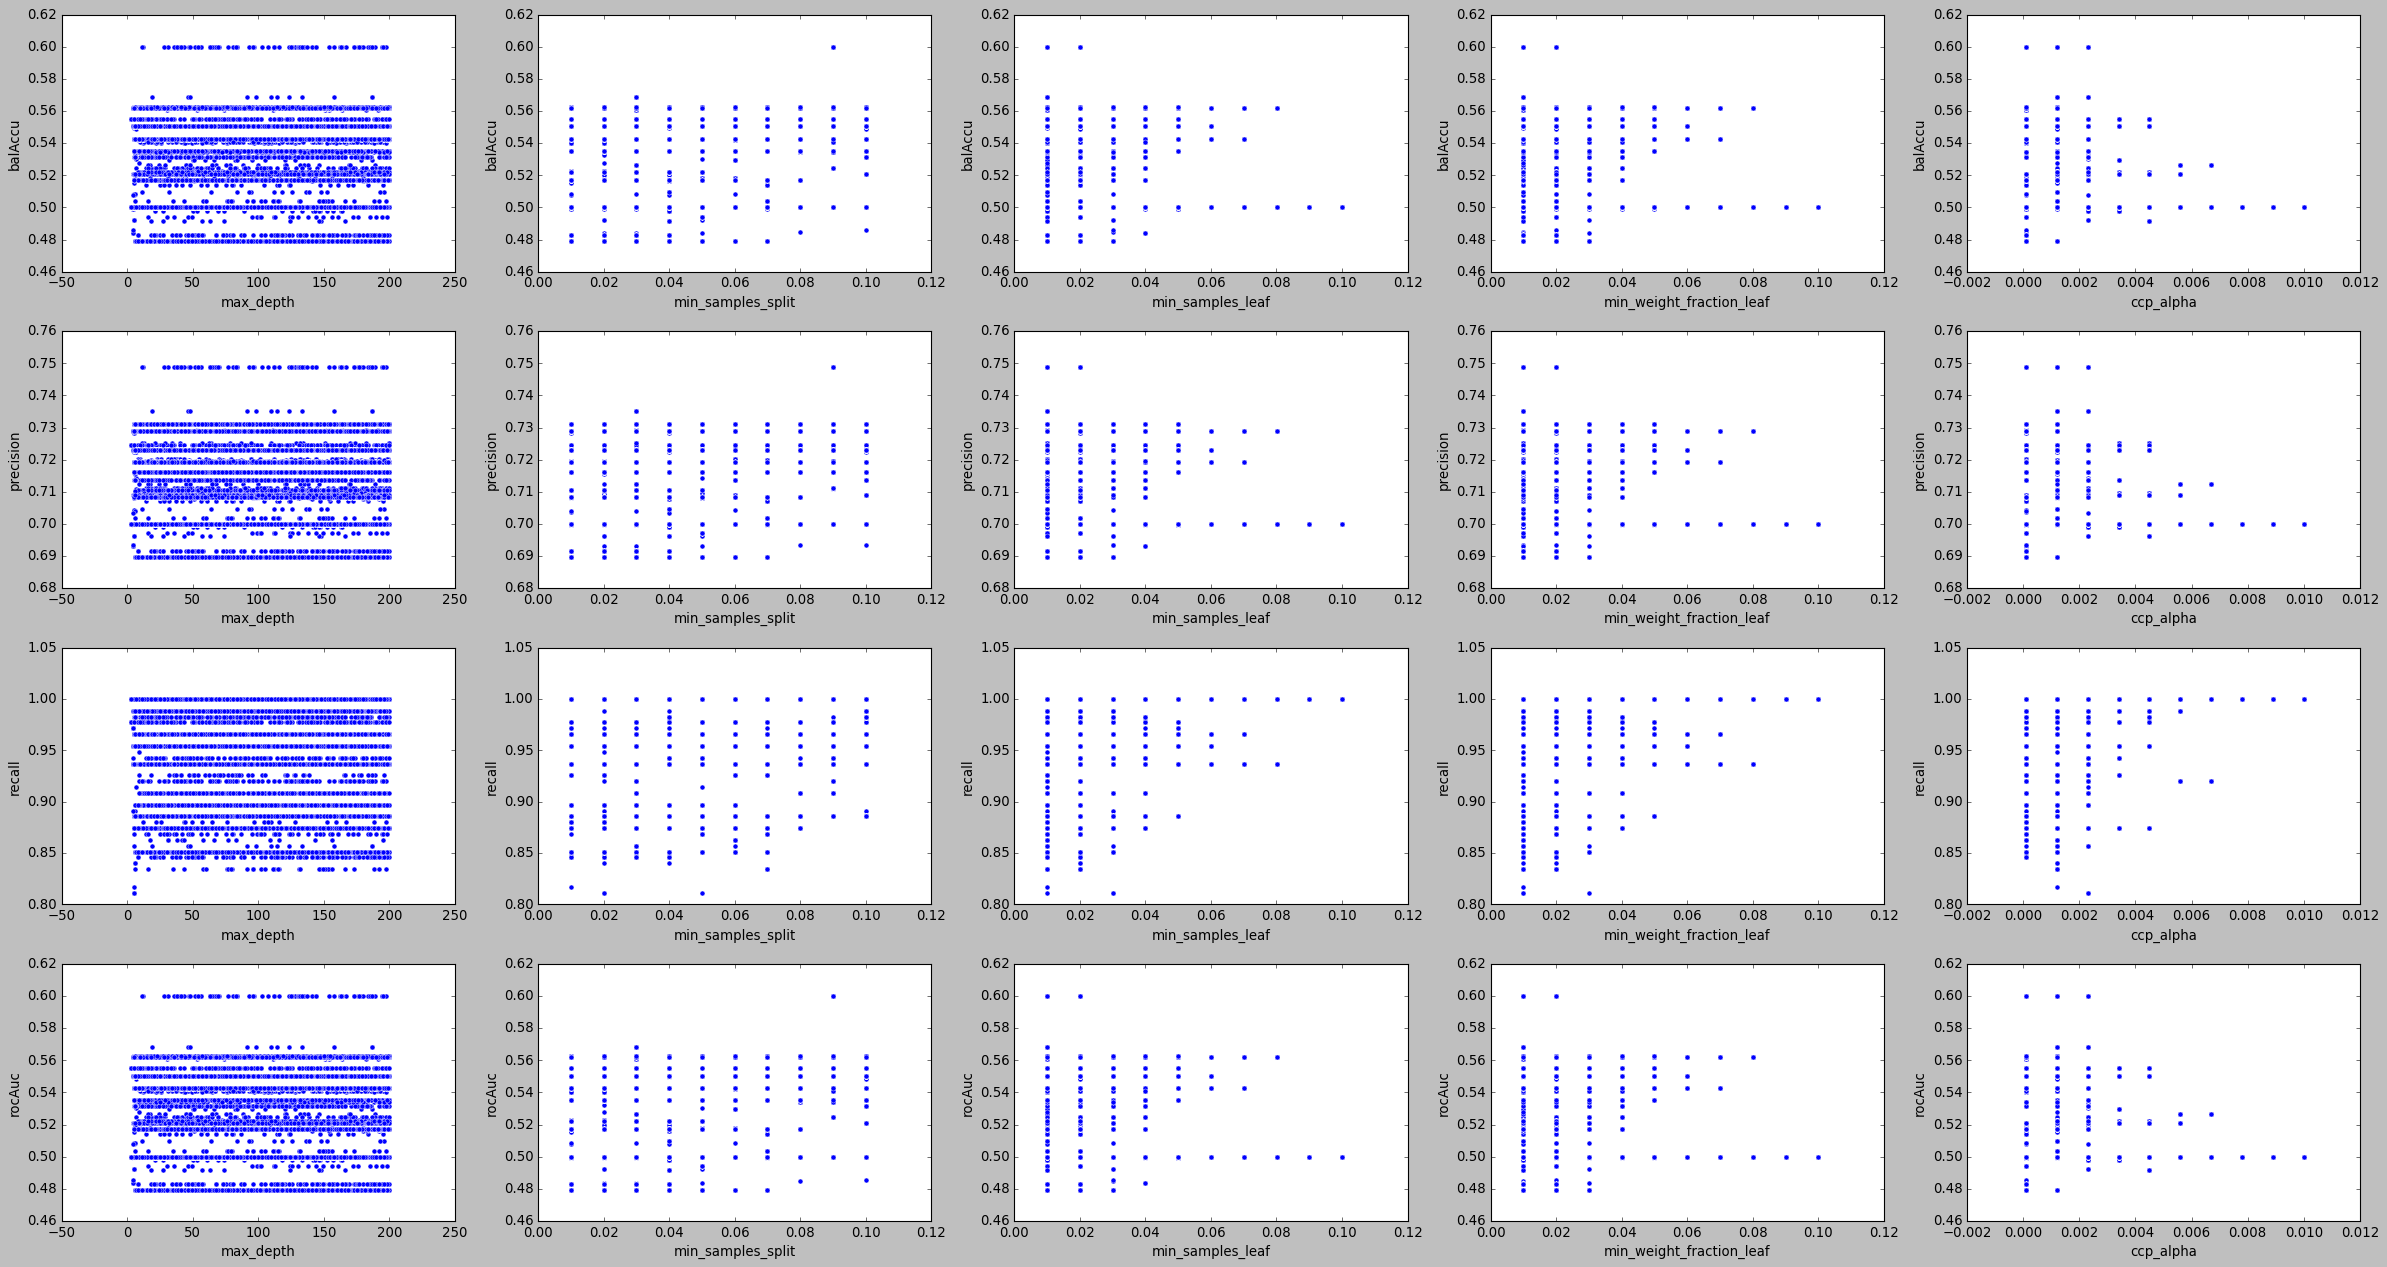

In [35]:
# result

scores_colNm = [ 'balAccu','precision','recall', 'rocAuc' ]
len_score = len( scores_colNm )

result_df = pd.DataFrame( result_ls, columns= inspect.getfullargspec(grdSrc_model).args + scores_colNm )
result_df.head()

## plots

data_toPlot = result_df

plt.style.use('classic')

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (30,len_score*4) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'balAccu',   ax= ax_flat[idx]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'precision', ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'recall',    ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'rocAuc',    ax= ax_flat[ idx+ 3*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout(); plt.show()

## 2nd hparam tuning

```
max_depth                 =   [  40, 150 ] 
min_samples_split         =   [  0.08, 1 ] 
min_samples_leaf          =   [  0.001, 0.03 ]
min_weight_fraction_leaf  =   [  0.001, 0.03 ]
ccp_alpha                 =   [  0.0001 - 0.003 ]
```

In [ ]:
## 2nd hparam tuning

# input feature
xtrn_np, xtst_np, ytrn_np, ytst_np = xtrn.to_numpy(), xtst.to_numpy(), ytrn.to_numpy(), ytst.to_numpy()

# hparams
max_depth                 =   np.linspace( 40, 100, 100-40+1, dtype= np.int16 )
min_samples_split         =   np.linspace( 0.08, 0.1, 25, dtype= np.float16 )
min_samples_leaf          =   np.linspace( 0.001, 0.003, 25, dtype= np.float16 )
min_weight_fraction_leaf  =   np.linspace( 0.001, 0.003, 25, dtype= np.float16 )
ccp_alpha                 =   np.linspace( 0.0001, 0.003, 25, dtype= np.float16  )

num_hp = 10000         # num of randomly choosen hparams

## create list of products of hparams

hparam_ls = [ max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, ccp_alpha ]   # <--  make sure the list contains all the hparams in correct order

# no edits below this -------------------------------------------------------------------------------------------------------------------------------------

hparam_len = 1
for e_hparam in hparam_ls:  hparam_len *= len(e_hparam)
## create list of products of hparams
hparam_Product_ls = [  list(e_product) for e_product in itertools.product( *hparam_ls )  ]
# select hparams randomly if num_hp < no of hparam
if num_hp >= hparam_len:   hparam_rnd = hparam_Product_ls
else:   hparam_rnd = random.sample( hparam_Product_ls, k= num_hp )

In [40]:
hparam_len

23828125

In [58]:
# run model with hparam set    

result_ls = []
len_hparam_rnd = len( hparam_rnd )
time_start = time.time()

for idx, e_hparam in enumerate(  hparam_rnd, start= 1 ):
    result_ls.append(  
                            grdSrc_model(  max_depth= e_hparam[0], min_samples_split= e_hparam[1], min_samples_leaf= e_hparam[2],
                                           min_weight_fraction_leaf= e_hparam[3], ccp_alpha= e_hparam[4]  )
                    )
    
    if ( idx / len_hparam_rnd*100 )%10 == 0:
        time_delta_hrs = round(  ( time.time() - time_start )/60, 2  )
        percent_complete = round( idx/len_hparam_rnd*100, 0 )
        print( f'----------- {percent_complete}  % complete  ----------   Time taken: {time_delta_hrs} mins    ----------\
        Remaining time: {round(time_delta_hrs*(100-percent_complete)/percent_complete,2)} mins' )
        
print( f'\n\nTotal time taken --------->  {(time.time()-time_start)/60} mins' )

----------- 10.0  % complete  ----------   Time taken: 0.04 mins    ----------        Remaining time: 0.36 mins
----------- 20.0  % complete  ----------   Time taken: 0.08 mins    ----------        Remaining time: 0.32 mins
----------- 30.0  % complete  ----------   Time taken: 0.12 mins    ----------        Remaining time: 0.28 mins
----------- 40.0  % complete  ----------   Time taken: 0.16 mins    ----------        Remaining time: 0.24 mins
----------- 50.0  % complete  ----------   Time taken: 0.2 mins    ----------        Remaining time: 0.2 mins
----------- 60.0  % complete  ----------   Time taken: 0.24 mins    ----------        Remaining time: 0.16 mins
----------- 70.0  % complete  ----------   Time taken: 0.28 mins    ----------        Remaining time: 0.12 mins
----------- 80.0  % complete  ----------   Time taken: 0.32 mins    ----------        Remaining time: 0.08 mins
----------- 90.0  % complete  ----------   Time taken: 0.36 mins    ----------        Remaining time: 0.04

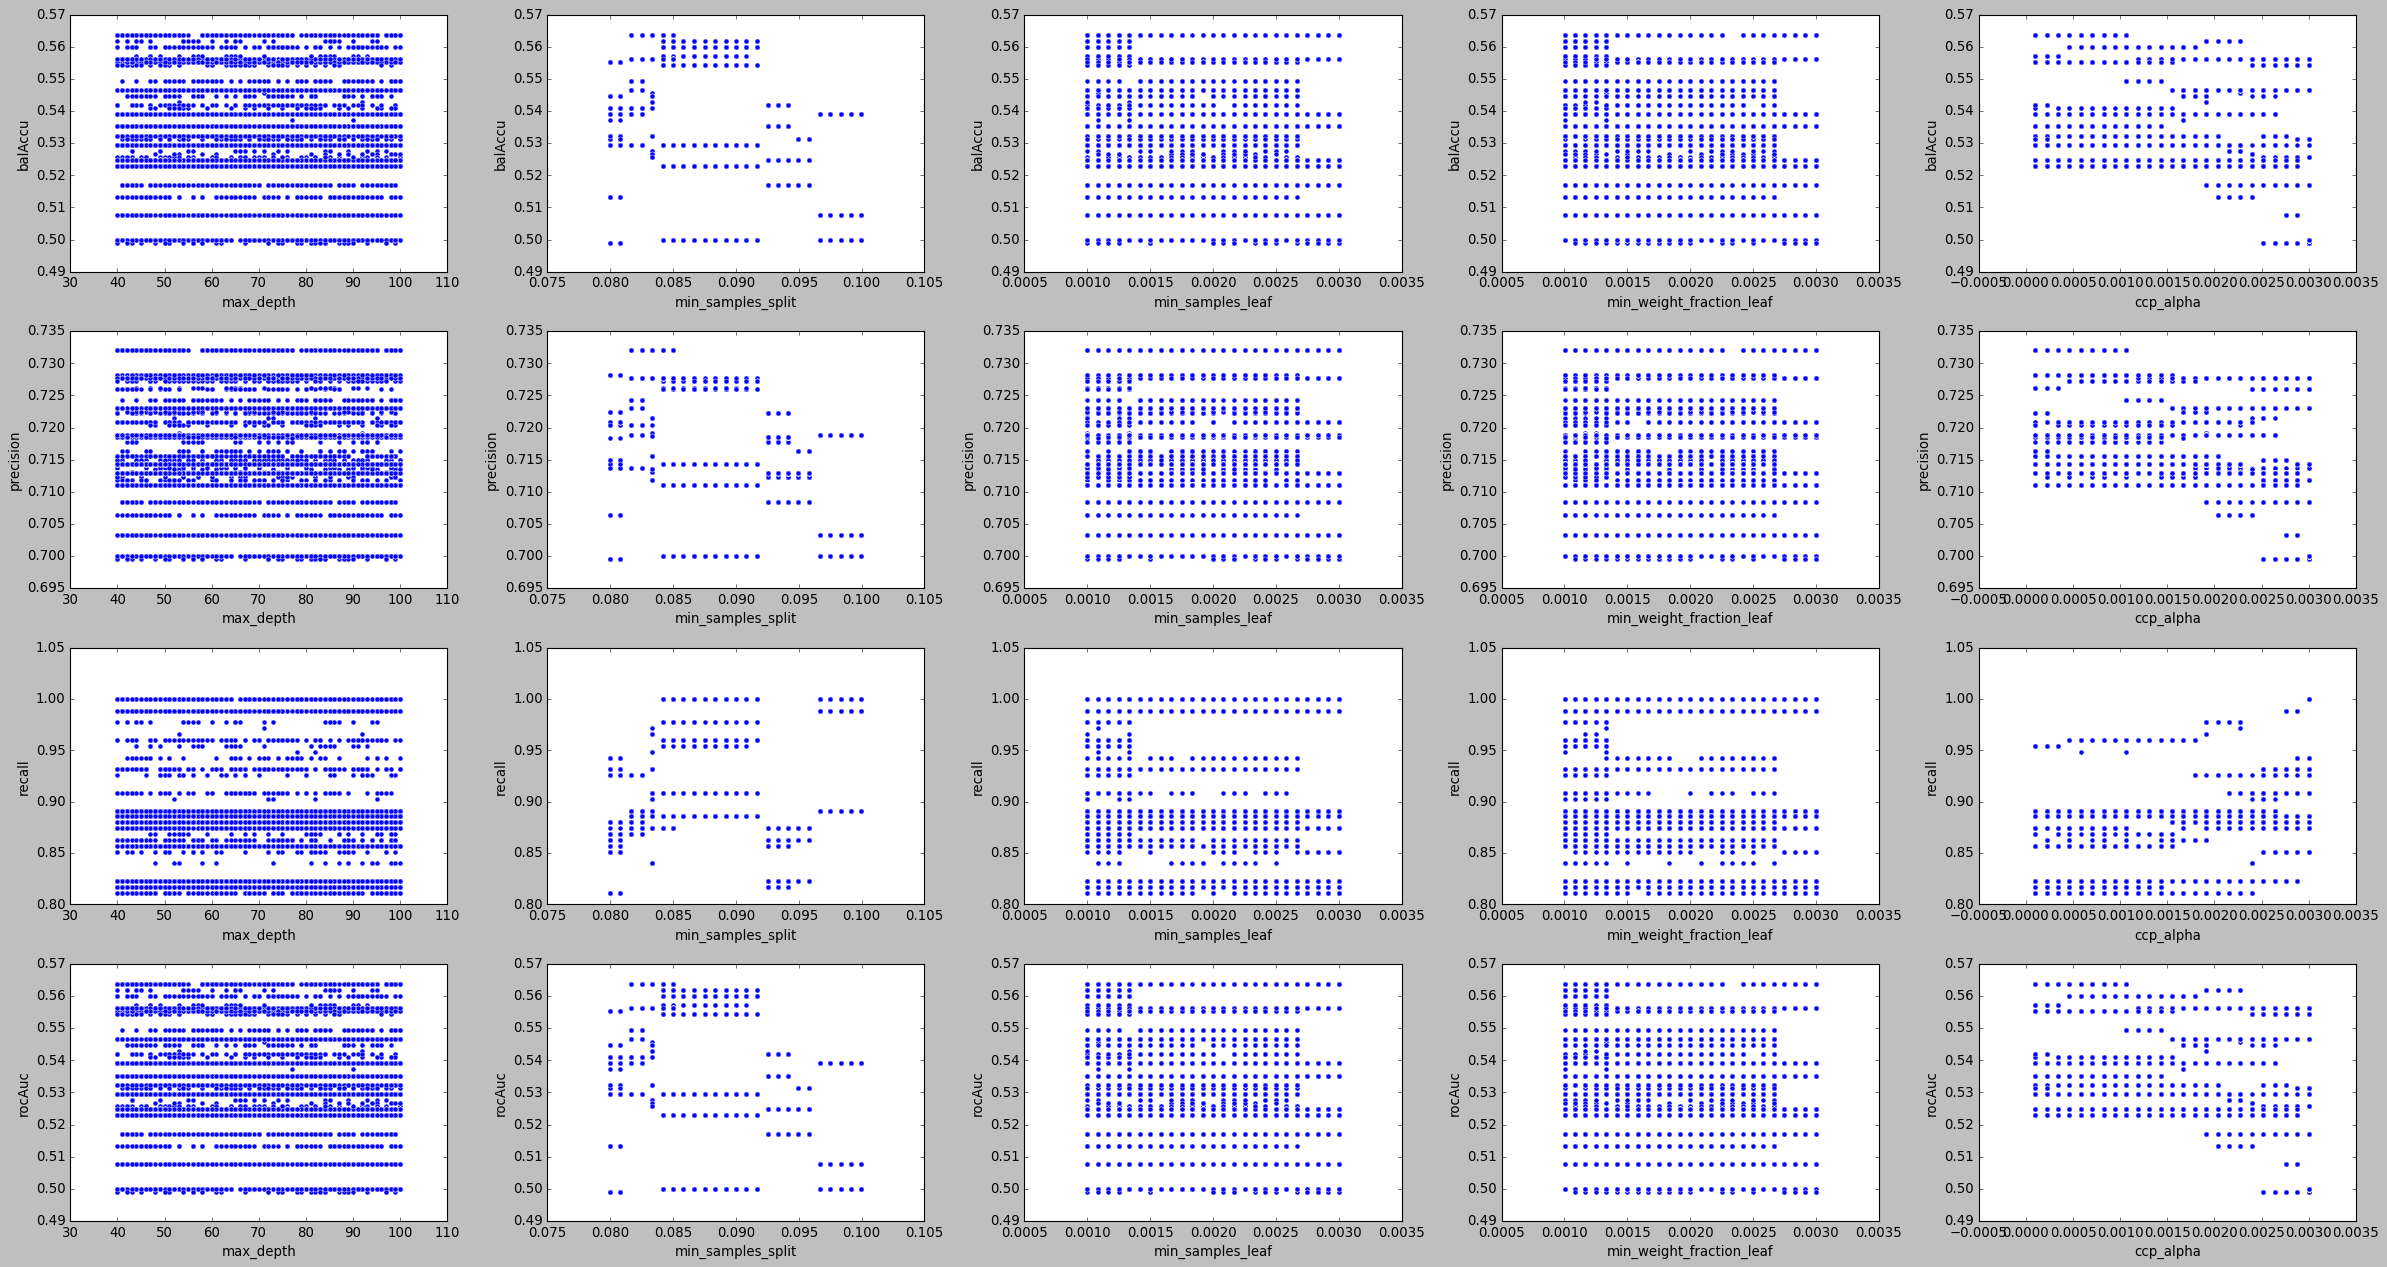

In [59]:
# result

scores_colNm = [ 'balAccu','precision','recall', 'rocAuc' ]
len_score = len( scores_colNm )

result_df = pd.DataFrame( result_ls, columns= inspect.getfullargspec(grdSrc_model).args + scores_colNm )
result_df.head()

## plots

data_toPlot = result_df

plt.style.use('classic')

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (30,len_score*4) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'balAccu',   ax= ax_flat[idx]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'precision', ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'recall',    ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'rocAuc',    ax= ax_flat[ idx+ 3*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout(); plt.show()

In [60]:
result_topN_dTree_df = result_df.sort_values( 'rocAuc', ascending= False ).head(10)
result_topN_dTree_df

,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,ccp_alpha,balAccu,precision,recall,rocAuc
1909,89,0.082520,0.002832,0.001166,0.000342,0.56381,0.732057,0.874286,0.56381
3917,45,0.084167,0.001166,0.002832,0.000946,0.56381,0.732057,0.874286,0.56381
6302,84,0.081665,0.002832,0.002583,0.000583,0.56381,0.732057,0.874286,0.56381
5002,63,0.084167,0.003000,0.001166,0.000100,0.56381,0.732057,0.874286,0.56381
7842,70,0.082520,0.002750,0.002251,0.000463,0.56381,0.732057,0.874286,0.56381
8777,90,0.083313,0.002333,0.002916,0.000583,0.56381,0.732057,0.874286,0.56381
6287,99,0.082520,0.001833,0.003000,0.000946,0.56381,0.732057,0.874286,0.56381
7841,93,0.085022,0.001750,0.003000,0.000704,0.56381,0.732057,0.874286,0.56381
6773,59,0.083313,0.002251,0.003000,0.000946,0.56381,0.732057,0.874286,0.56381
2017,77,0.085022,0.001667,0.003000,0.000825,0.56381,0.732057,0.874286,0.56381


```
max_depth 	min_samples_split 	min_samples_leaf 	min_weight_fraction_leaf 	ccp_alpha 	balAccu 	precision 	recall 	    rocAuc
63 	           0.083313 	           0.001500 	        0.002750 	           0.000946 	0.56381 	0.732057 	0.874286 	   0.56381
```

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [ ]:
dtree_fit = sklearn.tree.DecisionTreeClassifier( max_depth = 63, min_samples_split = 0.083313, min_samples_leaf = 0.0015, min_weight_fraction_leaf = 0.002750, ccp_alpha =  0.000946, 
                                                 max_features = 'sqrt', random_state = 10 )\
                        .fit( xtrn_np, ytrn_np  )

fg,ax = plt.subplots( figsize= (25,10) )

sklearn.tree.plot_tree( decision_tree= dtree_fit, filled= True, rounded= True, fontsize= 12, ax= ax  )
plt.show()

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [18]:
##  grid search func for a model

def grdSrc_model( max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, ccp_alpha ) :
    global xtrn_np, xtst_np, ytrn_np, ytst_np
    
    rForest_fit = sklearn.ensemble.RandomForestClassifier(   max_depth= max_depth, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf,
                                                             min_weight_fraction_leaf= min_weight_fraction_leaf, ccp_alpha= ccp_alpha,   
                                                             max_features= 'sqrt', n_jobs= -1
                                                       )\
                                        .fit( xtrn_np, ytrn_np  )
    yhat = rForest_fit.predict( xtst_np )
    
    # calc the classification metrics
    try: balAccu = sklearn.metrics.balanced_accuracy_score( y_true= ytst_np, y_pred= yhat )
    except: balAccu = np.nan
        
    try: precisionScore = sklearn.metrics.precision_score( ytst_np, yhat ) 
    except: precisionScore = np.nan
        
    try: recallScore = sklearn.metrics.recall_score( ytst_np, yhat )
    except: recallScore = np.nan
        
    try: rocAuc = sklearn.metrics.roc_auc_score( ytst_np, yhat )
    except: rocAuc = np.nan    
        
    return(  [  max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, ccp_alpha,
                balAccu, precisionScore, recallScore, rocAuc ]  )

In [19]:
## 2nd hparam tuning

# input feature
xtrn_np, xtst_np, ytrn_np, ytst_np = xtrn.to_numpy(), xtst.to_numpy(), ytrn.to_numpy(), ytst.to_numpy()

# hparams
max_depth                 =   np.linspace( 10, 100, 100-10+1, dtype= np.int16 )
min_samples_split         =   np.linspace( 2, 10, 10-2+1, dtype= np.int8 )
min_samples_leaf          =   np.linspace( 1,3,3, dtype= np.int8 )
min_weight_fraction_leaf  =   np.linspace( 0.01, 0.1, 25, dtype= np.float16 )
ccp_alpha                 =   np.linspace( 0.0001, 0.003, 25, dtype= np.float16  )

num_hp = 500         # num of randomly choosen hparams

## create list of products of hparams

hparam_ls = [ max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, ccp_alpha ]   # <--  make sure the list contains all the hparams in correct order

# no edits below this -------------------------------------------------------------------------------------------------------------------------------------

hparam_len = 1
for e_hparam in hparam_ls:  hparam_len *= len(e_hparam)
## create list of products of hparams
hparam_Product_ls = [  list(e_product) for e_product in itertools.product( *hparam_ls )  ]
# select hparams randomly if num_hp < no of hparam
if num_hp >= hparam_len:   hparam_rnd = hparam_Product_ls
else:   hparam_rnd = random.sample( hparam_Product_ls, k= num_hp )

In [21]:
hparam_len

1535625

In [20]:
# run model with hparam set    

result_ls = []
len_hparam_rnd = len( hparam_rnd )
time_start = time.time()

for idx, e_hparam in enumerate(  hparam_rnd, start= 1 ):
    result_ls.append(  
                            grdSrc_model(  max_depth= e_hparam[0], min_samples_split= e_hparam[1], min_samples_leaf= e_hparam[2],
                                           min_weight_fraction_leaf= e_hparam[3], ccp_alpha= e_hparam[4]  )
                    )
    
    if ( idx / len_hparam_rnd*100 )%10 == 0:
        time_delta_hrs = round(  ( time.time() - time_start )/60, 2  )
        percent_complete = round( idx/len_hparam_rnd*100, 0 )
        print( f'----------- {percent_complete}  % complete  ----------   Time taken: {time_delta_hrs} mins    ----------\
        Remaining time: {round(time_delta_hrs*(100-percent_complete)/percent_complete,2)} mins' )
        
print( f'\n\nTotal time taken --------->  {(time.time()-time_start)/60} mins' )

----------- 10.0  % complete  ----------   Time taken: 0.11 mins    ----------        Remaining time: 0.99 mins
----------- 20.0  % complete  ----------   Time taken: 0.23 mins    ----------        Remaining time: 0.92 mins
----------- 30.0  % complete  ----------   Time taken: 0.34 mins    ----------        Remaining time: 0.79 mins
----------- 40.0  % complete  ----------   Time taken: 0.46 mins    ----------        Remaining time: 0.69 mins
----------- 50.0  % complete  ----------   Time taken: 0.57 mins    ----------        Remaining time: 0.57 mins
----------- 60.0  % complete  ----------   Time taken: 0.69 mins    ----------        Remaining time: 0.46 mins
----------- 70.0  % complete  ----------   Time taken: 0.8 mins    ----------        Remaining time: 0.34 mins
----------- 80.0  % complete  ----------   Time taken: 0.92 mins    ----------        Remaining time: 0.23 mins
----------- 90.0  % complete  ----------   Time taken: 1.03 mins    ----------        Remaining time: 0.1

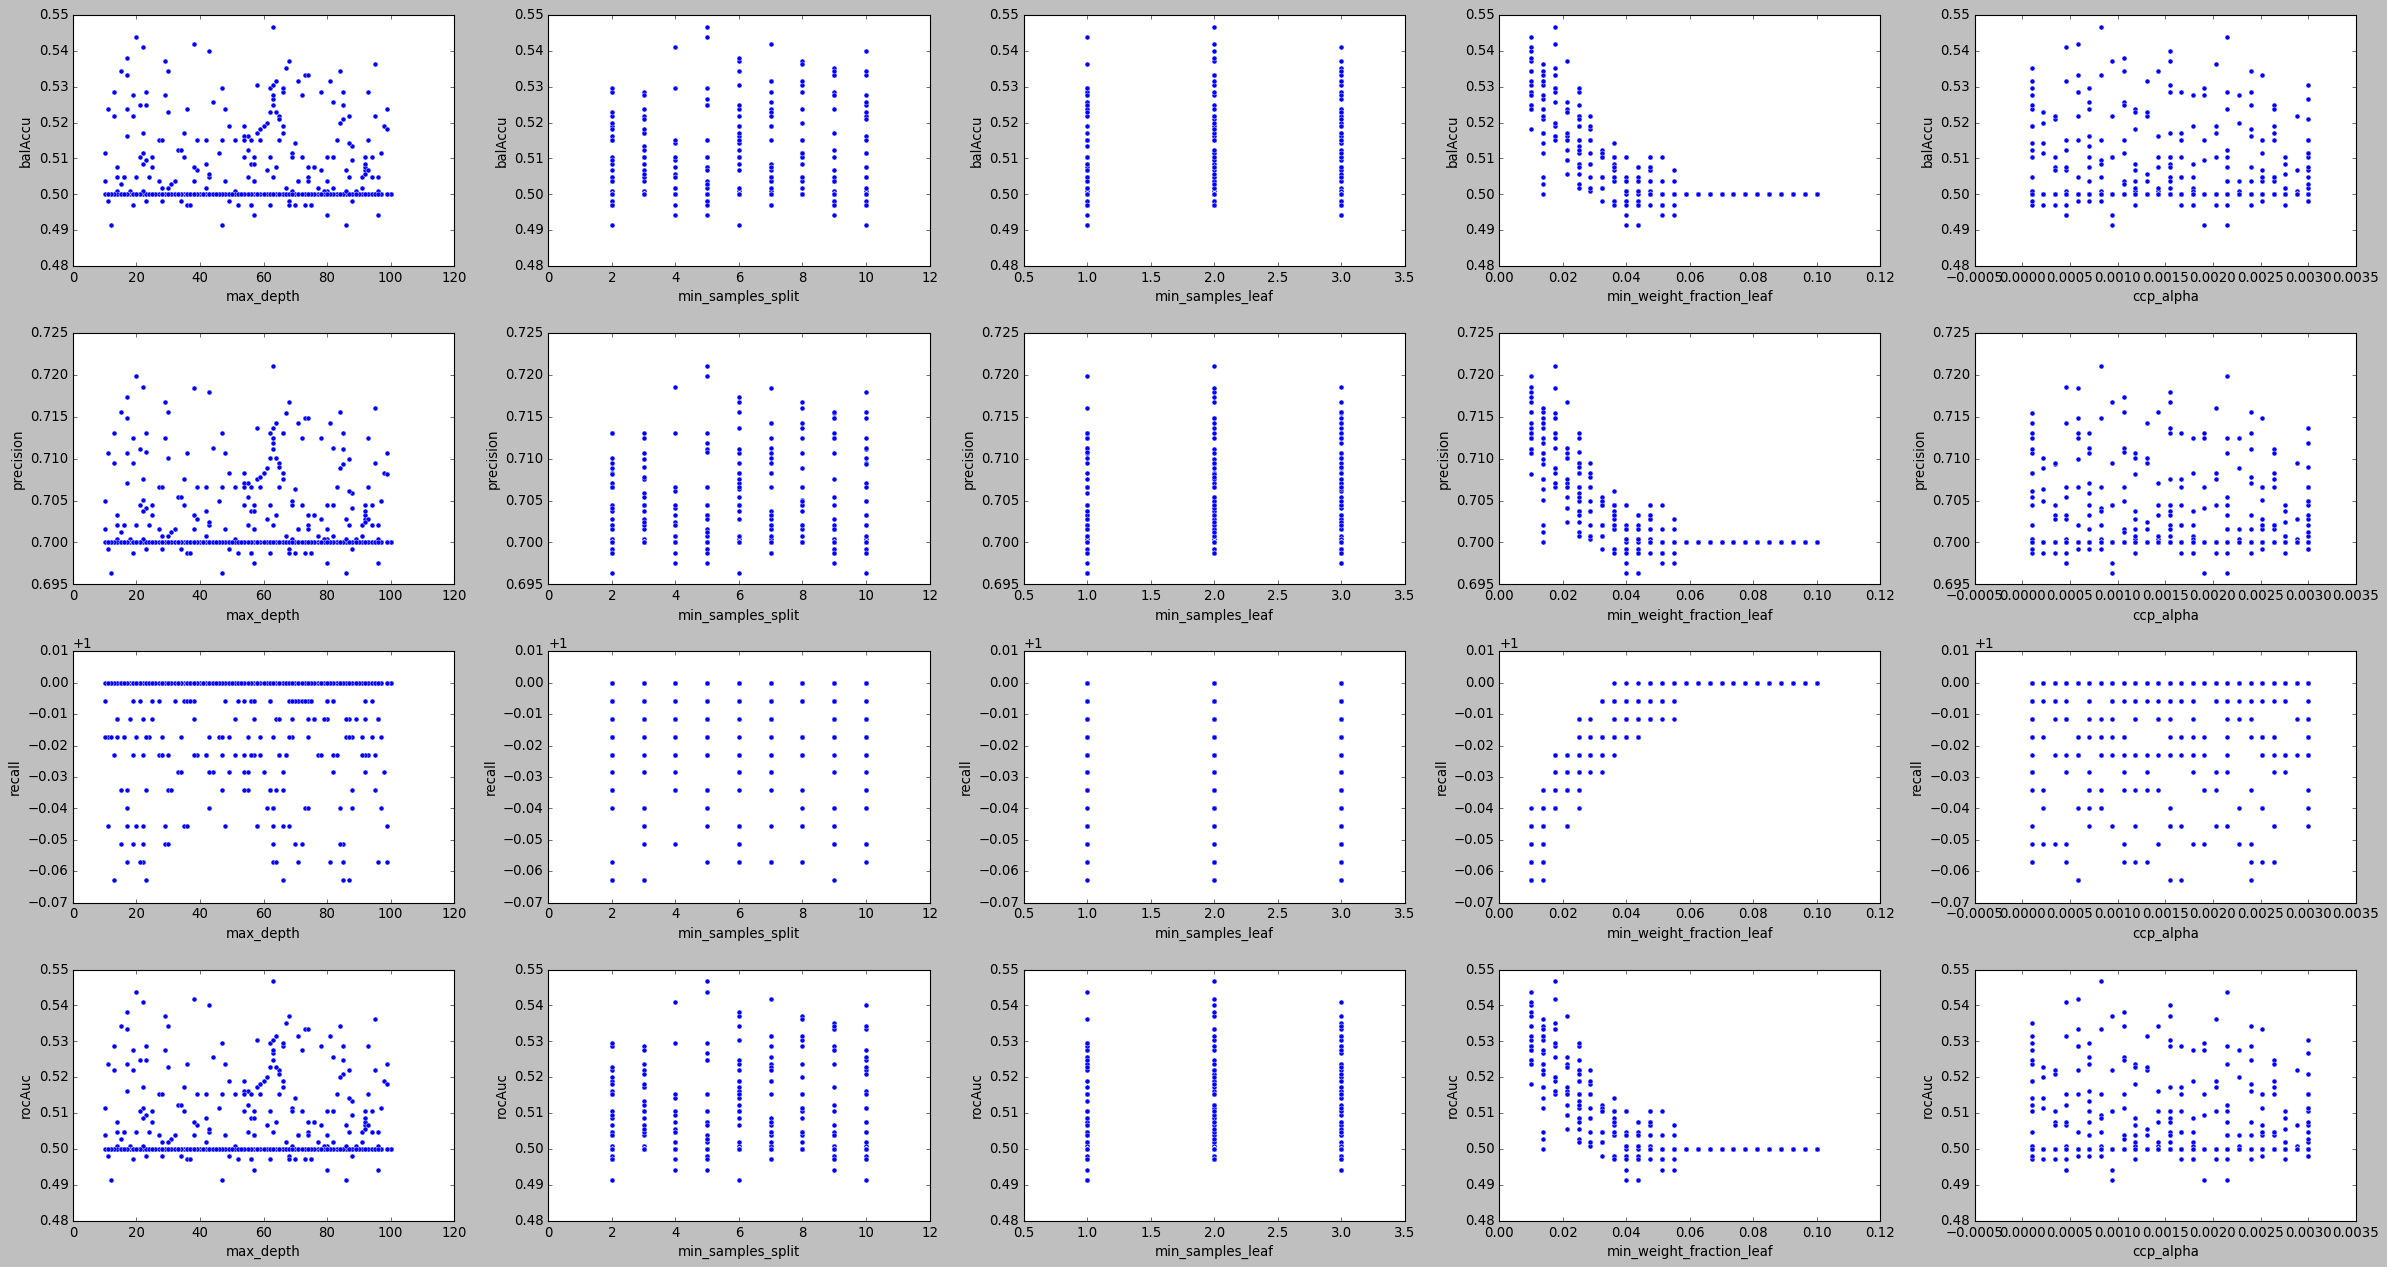

In [22]:
# result

scores_colNm = [ 'balAccu','precision','recall', 'rocAuc' ]
len_score = len( scores_colNm )

result_df = pd.DataFrame( result_ls, columns= inspect.getfullargspec(grdSrc_model).args + scores_colNm )
result_df.head()

## plots

data_toPlot = result_df

plt.style.use('classic')

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (30,len_score*4) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'balAccu',   ax= ax_flat[idx]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'precision', ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'recall',    ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'rocAuc',    ax= ax_flat[ idx+ 3*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout(); plt.show()

In [23]:
result_topN_RForest_df = result_df.sort_values( 'rocAuc', ascending= False ).head(10)
result_topN_RForest_df

,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,ccp_alpha,balAccu,precision,recall,rocAuc
159,63,5,2,0.017502,0.000825,0.546667,0.721030,0.960000,0.546667
261,20,5,1,0.010002,0.002153,0.543810,0.719828,0.954286,0.543810
406,38,7,2,0.017502,0.000583,0.541905,0.718487,0.977143,0.541905
469,22,4,3,0.010002,0.000463,0.540952,0.718615,0.948571,0.540952
74,43,10,2,0.010002,0.001550,0.540000,0.717949,0.960000,0.540000
349,17,6,2,0.010002,0.001066,0.538095,0.717391,0.942857,0.538095
252,68,8,3,0.010002,0.000946,0.537143,0.716738,0.954286,0.537143
348,29,6,2,0.021255,0.001550,0.537143,0.716738,0.954286,0.537143
279,95,8,1,0.013748,0.002033,0.536190,0.716102,0.965714,0.536190
113,67,9,3,0.017502,0.000100,0.535238,0.715481,0.977143,0.535238


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [27]:
xtrn

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,ForeignWorker
855,24,1474,4,3,33,1,1,1
354,10,727,4,4,46,1,1,1
339,10,1521,4,2,31,1,1,1
467,48,7238,3,3,32,2,2,1
657,48,10222,4,3,37,1,1,1
...,...,...,...,...,...,...,...,...
430,5,3448,1,4,74,1,1,1
186,9,5129,2,4,74,1,2,1
89,12,1108,4,3,28,2,1,1
534,24,3105,4,2,25,2,1,1


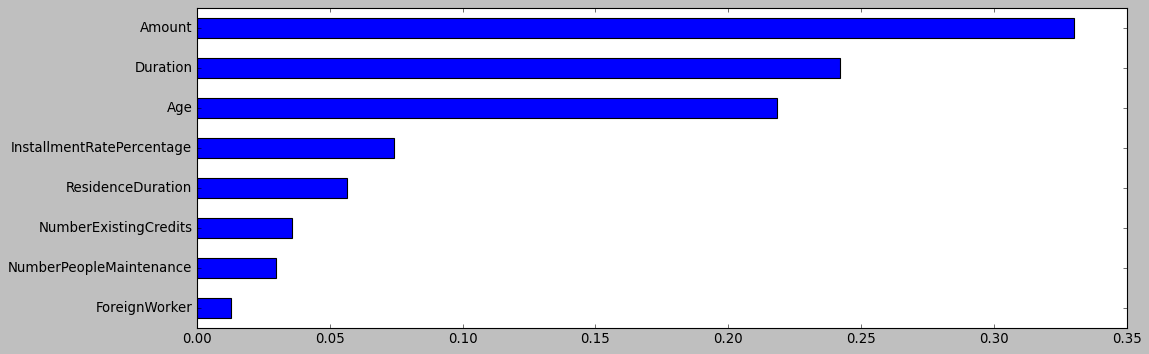

In [28]:
rForest_fit = sklearn.ensemble.RandomForestClassifier(   max_depth= 63, min_samples_split= 5, min_samples_leaf= 2,
                                                         min_weight_fraction_leaf= 0.0175, ccp_alpha= 0.000825,   
                                                         max_features= 'sqrt', n_jobs= -1
                                                     )\
                                        .fit( xtrn_np, ytrn_np  )


feature_imp = pd.Series( rForest_fit.feature_importances_, index= xtrn.columns ).sort_values()

feature_imp.plot( kind= 'barh', figsize= (15,5) );

In [ ]:
print( randomForest_est.feature_importances_ )

feature_imp = pd.Series( randomForest_est.feature_importances_, index= xtrn.columns ).sort_values()

feature_imp.plot( kind= 'barh', figsize= (15,5) );

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [40]:
import pdpbox

ModuleNotFoundError: No module named 'pdpbox'

In [42]:
# ! pip install pdpbox
# import pdpbox
import pdpbox
from pdpbox import pdp, get_dataset, info_plots

ModuleNotFoundError: No module named 'pdpbox'

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [31]:
xtrn.head(3)

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,ForeignWorker
855,24,1474,4,3,33,1,1,1
354,10,727,4,4,46,1,1,1
339,10,1521,4,2,31,1,1,1


In [32]:
ig, axes, summary_df = pd  info_plots.target_plot( df= xtrn, feature= 'NumberExistingCredits', feature_name='Credit', target= ytrn )

NameError: name 'info_plots' is not defined

error in installing the library and thus couldn't plot pdpbox plots

#### Top 10 results of the 2 models used in thehis notebook ( Decision Tree & Random Forest )

In [61]:
result_topN_RForest_df

,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,ccp_alpha,balAccu,precision,recall,rocAuc
159,63,5,2,0.017502,0.000825,0.546667,0.721030,0.960000,0.546667
261,20,5,1,0.010002,0.002153,0.543810,0.719828,0.954286,0.543810
406,38,7,2,0.017502,0.000583,0.541905,0.718487,0.977143,0.541905
469,22,4,3,0.010002,0.000463,0.540952,0.718615,0.948571,0.540952
74,43,10,2,0.010002,0.001550,0.540000,0.717949,0.960000,0.540000
349,17,6,2,0.010002,0.001066,0.538095,0.717391,0.942857,0.538095
252,68,8,3,0.010002,0.000946,0.537143,0.716738,0.954286,0.537143
348,29,6,2,0.021255,0.001550,0.537143,0.716738,0.954286,0.537143
279,95,8,1,0.013748,0.002033,0.536190,0.716102,0.965714,0.536190
113,67,9,3,0.017502,0.000100,0.535238,0.715481,0.977143,0.535238


In [62]:
result_topN_dTree_df

,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,ccp_alpha,balAccu,precision,recall,rocAuc
1909,89,0.082520,0.002832,0.001166,0.000342,0.56381,0.732057,0.874286,0.56381
3917,45,0.084167,0.001166,0.002832,0.000946,0.56381,0.732057,0.874286,0.56381
6302,84,0.081665,0.002832,0.002583,0.000583,0.56381,0.732057,0.874286,0.56381
5002,63,0.084167,0.003000,0.001166,0.000100,0.56381,0.732057,0.874286,0.56381
7842,70,0.082520,0.002750,0.002251,0.000463,0.56381,0.732057,0.874286,0.56381
8777,90,0.083313,0.002333,0.002916,0.000583,0.56381,0.732057,0.874286,0.56381
6287,99,0.082520,0.001833,0.003000,0.000946,0.56381,0.732057,0.874286,0.56381
7841,93,0.085022,0.001750,0.003000,0.000704,0.56381,0.732057,0.874286,0.56381
6773,59,0.083313,0.002251,0.003000,0.000946,0.56381,0.732057,0.874286,0.56381
2017,77,0.085022,0.001667,0.003000,0.000825,0.56381,0.732057,0.874286,0.56381
